# DMV Assignment-5

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("NewDelhi_Air_quality.csv")
df.head()

,Unnamed: 0,AQI,CO,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,0,30.2,198.60268,2022-10-21:18,0.046857,55.789948,10.486722,5.637410,0.387430,2022-10-21T23:00:00,2022-10-21T18:00:00,1666375200
1,1,28.2,197.60132,2022-10-21:19,0.046456,54.931640,10.719325,4.618169,0.409782,2022-10-22T00:00:00,2022-10-21T19:00:00,1666378800
2,2,26.6,198.60268,2022-10-21:20,0.046857,54.645540,11.155578,3.520902,0.402331,2022-10-22T01:00:00,2022-10-21T20:00:00,1666382400
3,3,25.0,201.94054,2022-10-21:21,0.048196,55.074690,11.116206,2.225919,0.376254,2022-10-22T02:00:00,2022-10-21T21:00:00,1666386000
4,4,26.0,205.27840,2022-10-21:22,0.048865,55.789948,10.405250,1.979471,0.339001,2022-10-22T03:00:00,2022-10-21T22:00:00,1666389600


# Data Preprocessing

In [41]:
df.columns

Index(['Unnamed: 0', 'AQI', 'CO', 'datetime', 'no2', 'o3', 'pm10', 'pm25',
       'so2', 'timestamp_local', 'timestamp_utc', 'ts'],
      dtype='object')

In [42]:
df.shape

(72, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       72 non-null     int64  
 1   AQI              72 non-null     float64
 2   CO               72 non-null     float64
 3   datetime         72 non-null     object 
 4   no2              72 non-null     float64
 5   o3               72 non-null     float64
 6   pm10             72 non-null     float64
 7   pm25             72 non-null     float64
 8   so2              72 non-null     float64
 9   timestamp_local  72 non-null     object 
 10  timestamp_utc    72 non-null     object 
 11  ts               72 non-null     int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 6.9+ KB


In [44]:
df.describe()

,Unnamed: 0,AQI,CO,no2,o3,pm10,pm25,so2,ts
count,72.00000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,7.200000e+01
mean,35.50000,26.180556,200.095443,0.041996,56.571762,9.115038,2.295406,0.363423,1.666503e+09
std,20.92845,3.054650,4.515537,0.010940,6.431549,1.531785,0.656507,0.044664,7.534242e+04
min,0.00000,19.000000,191.926960,0.015563,41.484833,6.686746,1.633373,0.283122,1.666375e+09
25%,17.75000,25.000000,197.434427,0.037988,53.644180,7.864763,1.828729,0.320375,1.666439e+09
50%,35.50000,27.000000,200.271600,0.045518,57.220460,8.914176,2.201811,0.372529,1.666503e+09
75%,53.25000,28.000000,203.609470,0.050204,60.081482,10.274836,2.522210,0.395812,1.666567e+09
max,71.00000,32.000000,208.616260,0.060914,68.664550,12.845977,5.637410,0.454485,1.666631e+09


In [45]:
df.dtypes

Unnamed: 0           int64
AQI                float64
CO                 float64
datetime            object
no2                float64
o3                 float64
pm10               float64
pm25               float64
so2                float64
timestamp_local     object
timestamp_utc       object
ts                   int64
dtype: object

# Checking Null values

In [46]:
df.isnull().sum()

Unnamed: 0         0
AQI                0
CO                 0
datetime           0
no2                0
o3                 0
pm10               0
pm25               0
so2                0
timestamp_local    0
timestamp_utc      0
ts                 0
dtype: int64

# Checking Duplicate values

In [47]:
df.duplicated().sum()

0

# Deleting unecessary column

In [48]:
df = df.drop('Unnamed: 0', axis=1)

In [49]:
df.head()

,AQI,CO,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,30.2,198.60268,2022-10-21:18,0.046857,55.789948,10.486722,5.637410,0.387430,2022-10-21T23:00:00,2022-10-21T18:00:00,1666375200
1,28.2,197.60132,2022-10-21:19,0.046456,54.931640,10.719325,4.618169,0.409782,2022-10-22T00:00:00,2022-10-21T19:00:00,1666378800
2,26.6,198.60268,2022-10-21:20,0.046857,54.645540,11.155578,3.520902,0.402331,2022-10-22T01:00:00,2022-10-21T20:00:00,1666382400
3,25.0,201.94054,2022-10-21:21,0.048196,55.074690,11.116206,2.225919,0.376254,2022-10-22T02:00:00,2022-10-21T21:00:00,1666386000
4,26.0,205.27840,2022-10-21:22,0.048865,55.789948,10.405250,1.979471,0.339001,2022-10-22T03:00:00,2022-10-21T22:00:00,1666389600


# Changing datatype

In [51]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d:%H')

In [52]:
df.dtypes

AQI                       float64
CO                        float64
datetime           datetime64[ns]
no2                       float64
o3                        float64
pm10                      float64
pm25                      float64
so2                       float64
timestamp_local            object
timestamp_utc              object
ts                          int64
dtype: object

# Data Visualization

# 1.Line plots to visualize the overall AQI trend over time

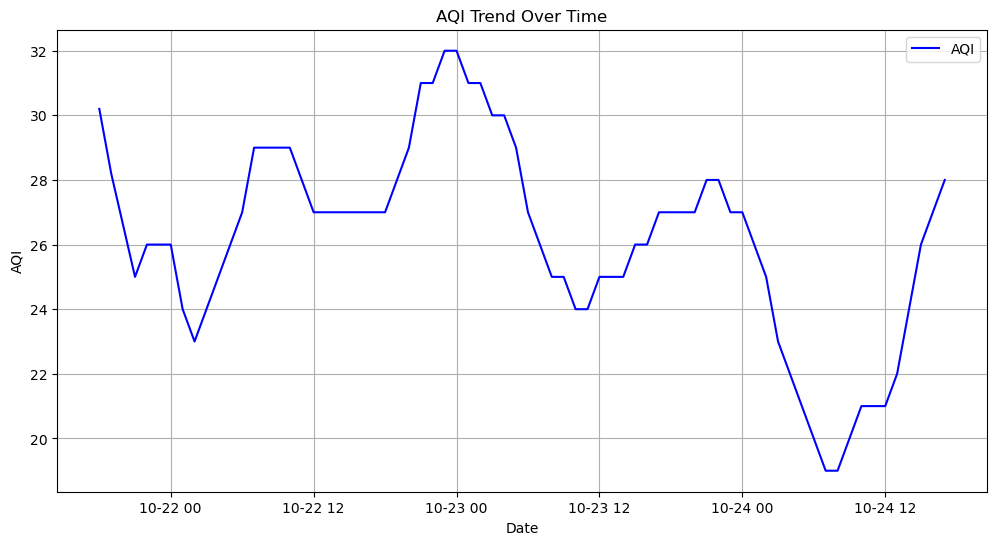

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['AQI'], label='AQI', color='b')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

# 2.line plots to visualize Individual Pollutant levels with their trends over time.

# a. line plot for CO

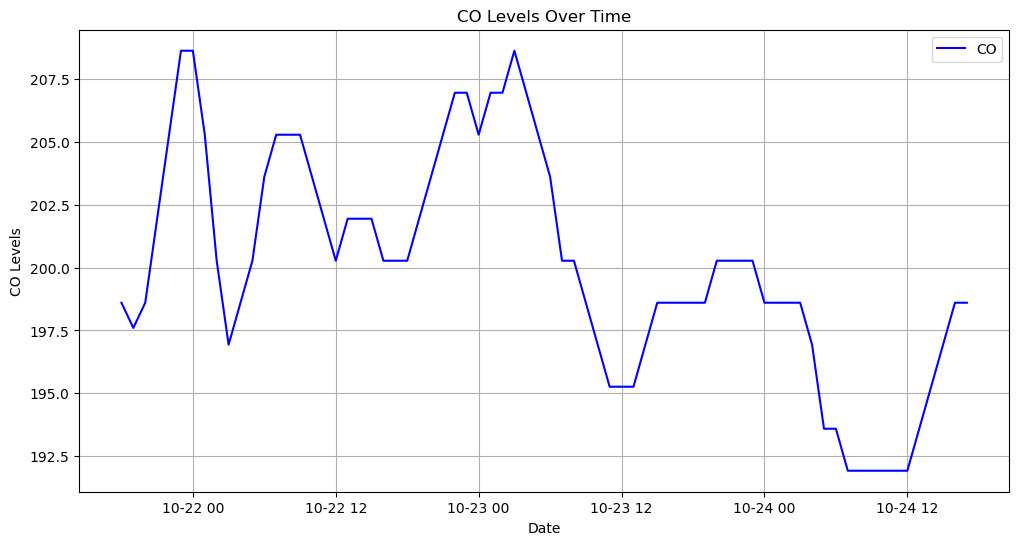

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['CO'], label='CO', color='b')
plt.xlabel('Date')
plt.ylabel('CO Levels')
plt.title('CO Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()

# b. line plot for pm10

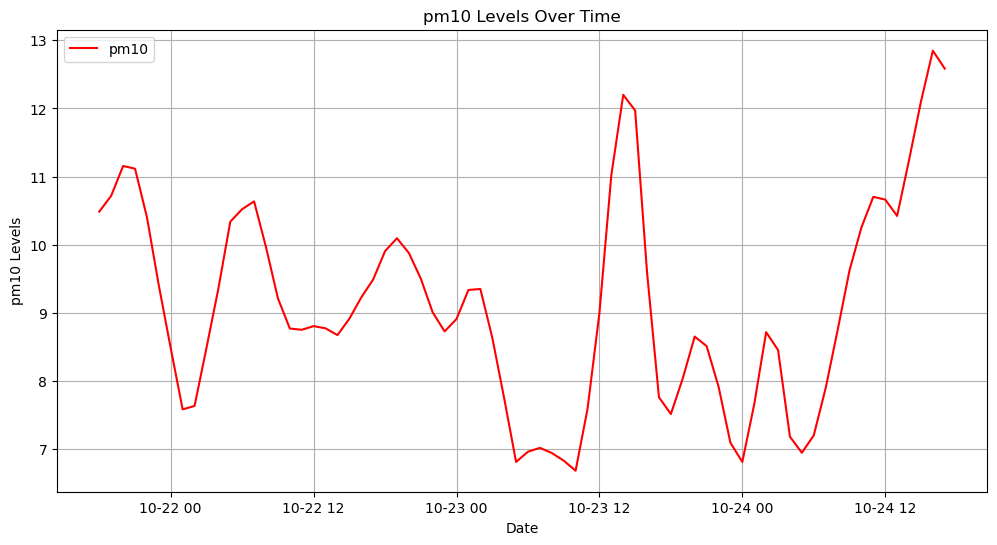

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['pm10'], label='pm10', color='r')
plt.xlabel('Date')
plt.ylabel('pm10 Levels')
plt.title('pm10 Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()

# c. line plot for pm25

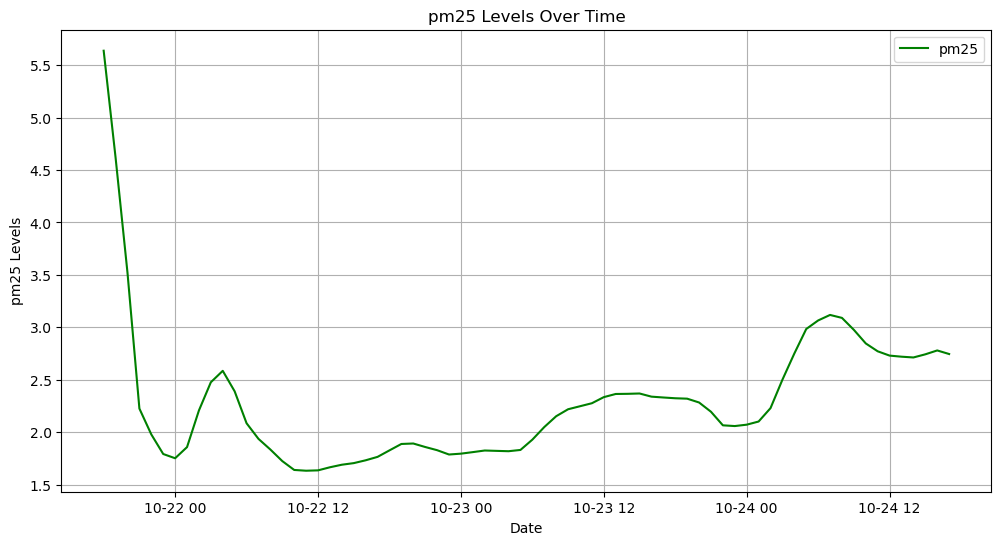

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['pm25'], label='pm25', color='g')
plt.xlabel('Date')
plt.ylabel('pm25 Levels')
plt.title('pm25 Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()

# d. line plot for no2

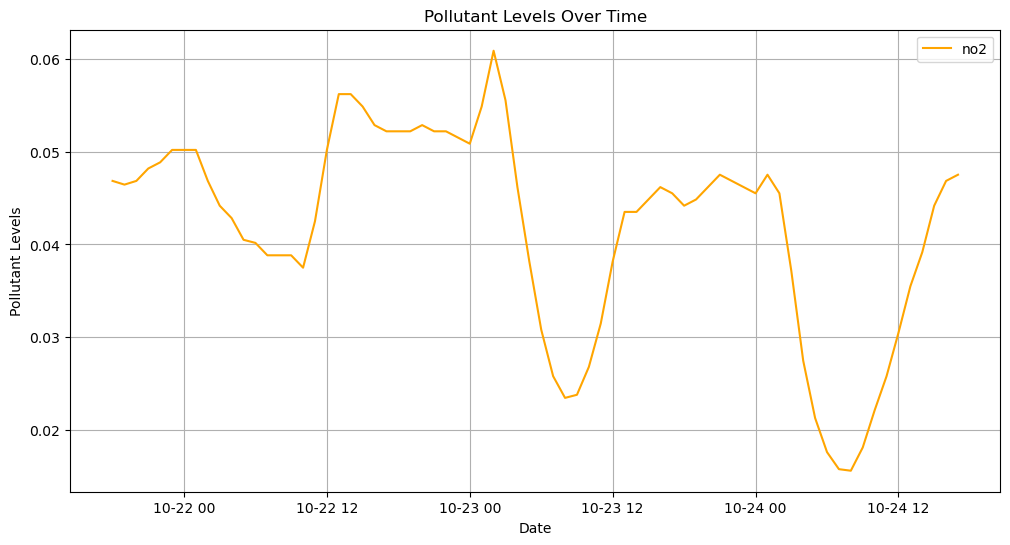

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['no2'], label='no2', color='orange')
plt.xlabel('Date')
plt.ylabel('Pollutant Levels')
plt.title('Pollutant Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()

# e. line plot for o3

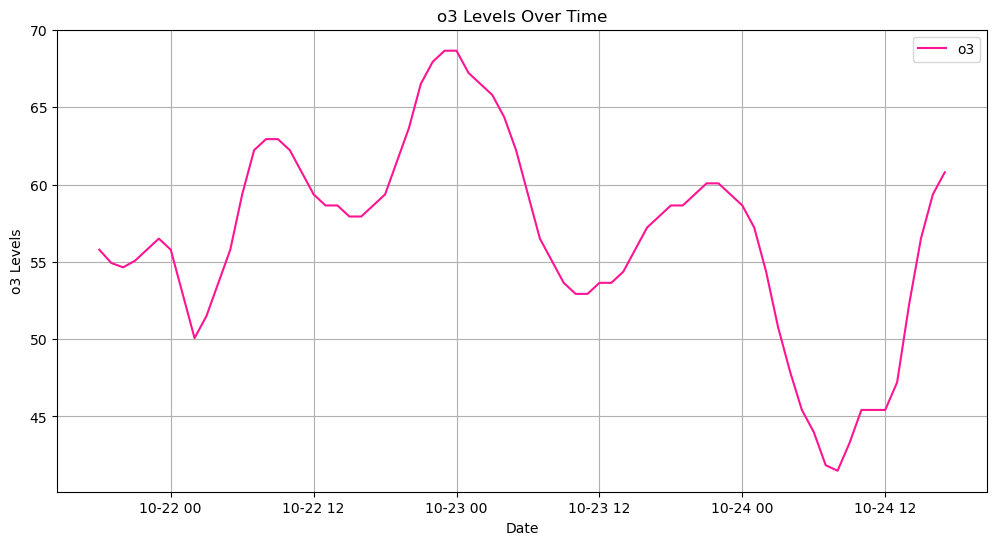

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['o3'], label='o3', color='deeppink')
plt.xlabel('Date')
plt.ylabel('o3 Levels')
plt.title('o3 Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()

# f. line plot for so2

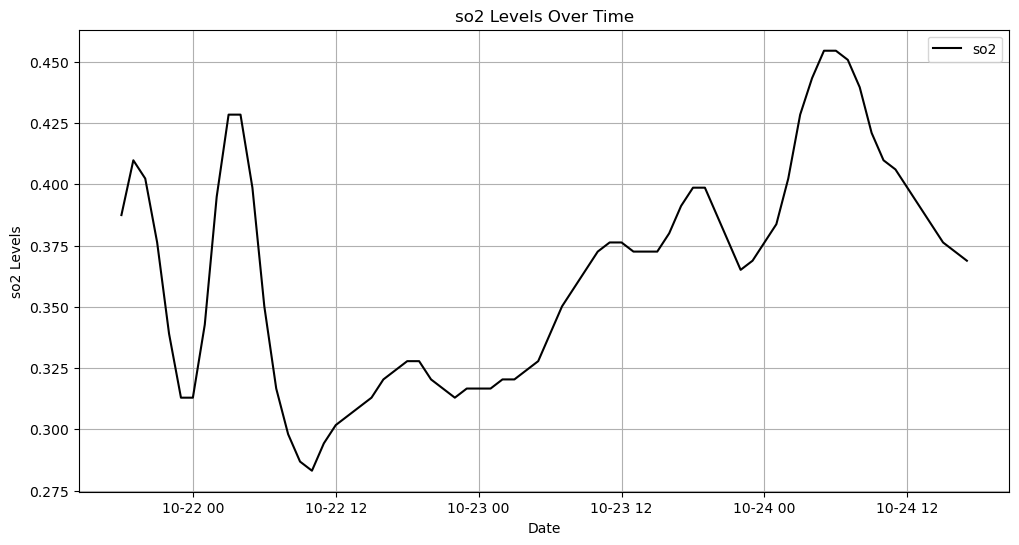

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['so2'], label='so2', color='k')
plt.xlabel('Date')
plt.ylabel('so2 Levels')
plt.title('so2 Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()

# 3.Bar plot to compare AQI values across dates

# Group the data by date and calculate the mean AQI for each date

In [91]:
daily_aqi = df.groupby(df['datetime'].dt.date)['AQI'].mean()

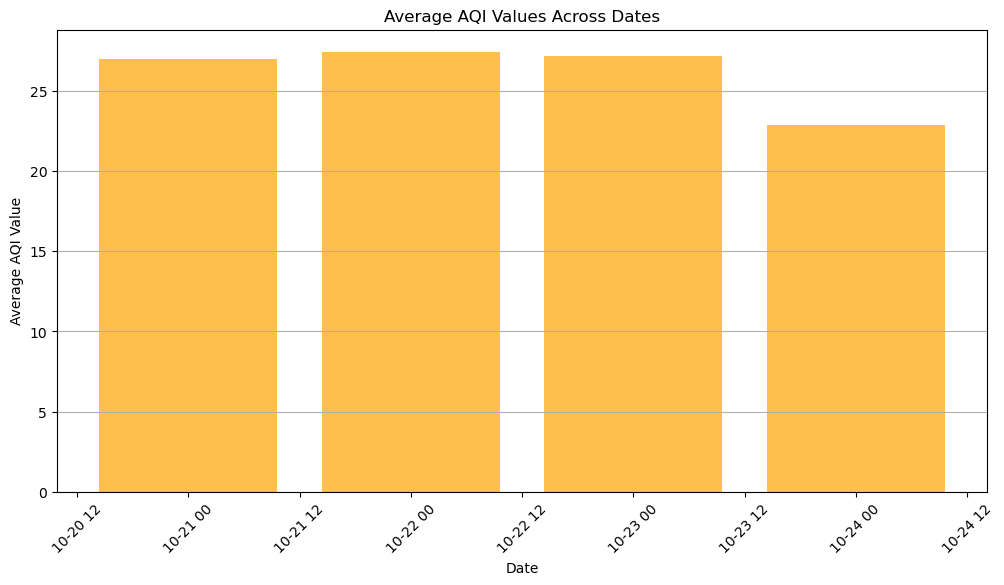

In [92]:
plt.figure(figsize=(12, 6))
plt.bar(daily_aqi.index, daily_aqi.values, color='orange', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Average AQI Value')
plt.title('Average AQI Values Across Dates')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 4.Box plots to analyze AQI value distribution for different pollutant categories

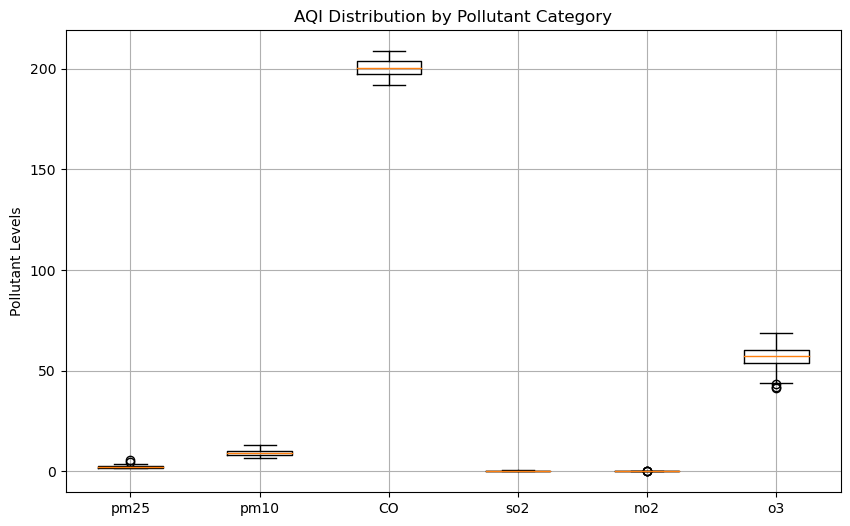

In [84]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['pm25'], df['pm10'], df['CO'],df['so2'],df['no2'],df['o3']], labels=['pm25', 'pm10', 'CO','so2','no2','o3'])
plt.ylabel('Pollutant Levels')
plt.title('AQI Distribution by Pollutant Category')
plt.grid(True)
plt.show()

# 5.Scatter plots to explore the relationship between AQI values and pollutant level

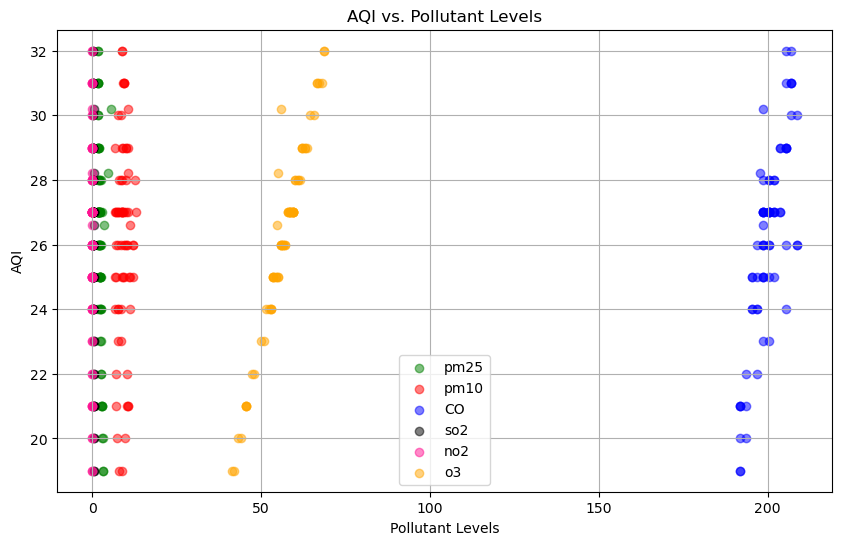

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(df['pm25'], df['AQI'], label='pm25', color='g', alpha=0.5)
plt.scatter(df['pm10'], df['AQI'], label='pm10', color='r', alpha=0.5)
plt.scatter(df['CO'], df['AQI'], label='CO', color='b', alpha=0.5)
plt.scatter(df['so2'], df['AQI'], label='so2', color='k', alpha=0.5)
plt.scatter(df['no2'], df['AQI'], label='no2', color='deeppink', alpha=0.5)
plt.scatter(df['o3'], df['AQI'], label='o3', color='orange', alpha=0.5)
plt.xlabel('Pollutant Levels')
plt.ylabel('AQI')
plt.title('AQI vs. Pollutant Levels')
plt.legend()
plt.grid(True)
plt.show()